# Foreword

The intention of this project is providing a thorough analysis of a dataset regarding it-related job offerings, where we analyse relevant aspects such as the job title, location and gross average salary. 

Due to time constraints, and the technical difficulties encountered in previous web scraping attempts, it has been withdrawn the option to scrap data from infojobs, since the general T&C of the website do not allow for web scrapping, plus, they have controls in place to block any web scrapping action. 

We insted take the data from a .csv dataset obtained from kaggle, whose link is provided in the initial section. 

1. the project consists of an analysis of IT industry job openings from a kaggle datasets that has a sample size of 3,755 elements
2. we provide information on the gross salary, irrespective of other benefits (contributions to pensions schema, health insurance, travel allowances, etc.)
3. we do not take into account the inflation effect / consumer price index (6,1% in the Eurozone as of June 2023) 
4. this dataset provides information as of April 2023 

Sources: digitalocean.com, kaggle, datacamp, geeks for geeks, eurostat, medium.com, towardsdatascience.com, educative.io, appsloveworld, datatechnotes, projectpro, askpython.com 

# Dataset 

# 1. Read the data

Data source: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

In [128]:
import pandas as pd                   
import numpy as np   

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OneHotEncoder

from sklearn.neighbors import KNeighborsRegressor

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

We will call 'init_dataset' to the original dataset that we have obtained from kaggle

In [66]:
init_dataset = pd.read_csv('ds_salaries (1).csv')
init_dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [67]:
print(init_dataset.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


With the following transformation we convert remote_ratios to unit values (0, 0.5, 1)

We will drop the variable 'work year', 'salary currency' and 'employee residence'

These variables will be essential though for data visualisation that we will perform with tableau 

On the other hand, we already have in the dataset the salary expressed in usd, which is a way to compare gross salaries across different locations worldwide where they have different currencies

We think that 'company location' might have a more direct impact on the 'salary' variable; 

New dataset looks like this: 

In [68]:
columns_to_drop = ['work_year', 'salary', 'salary_currency', 'employee_residence']
dataset = init_dataset.drop(columns=columns_to_drop)

In [69]:
dataset.head()

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,SE,FT,Principal Data Scientist,85847,100,ES,L
1,MI,CT,ML Engineer,30000,100,US,S
2,MI,CT,ML Engineer,25500,100,US,S
3,SE,FT,Data Scientist,175000,100,CA,M
4,SE,FT,Data Scientist,120000,100,CA,M


In [70]:
print(dataset['experience_level'].unique())

['SE' 'MI' 'EN' 'EX']


In [71]:
print(dataset['employment_type'].unique())

['FT' 'CT' 'FL' 'PT']


In [72]:
print(dataset['job_title'].unique())

['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scientist' 'Cloud Database Engineer' 'Financial Data Analyst'
 'Data Infrastructure Engineer' 'Software Data Engine

In [73]:
dataset['job_title'].nunique()

93

In [74]:
filtered_data = dataset[dataset['job_title'].str.contains(r'\bData', case=False)]

print(filtered_data['job_title'].unique())

['Principal Data Scientist' 'Data Scientist' 'Data Analyst' 'Data Modeler'
 'Data Strategist' 'Data Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect' 'Data Analytics Manager'
 'Business Data Analyst' 'Applied Data Scientist' 'Staff Data Analyst'
 'Data DevOps Engineer' 'Head of Data' 'Data Science Manager'
 'Data Manager' 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science' 'Lead Data Scientist'
 'Cloud Database Engineer' 'Financial Data Analyst'
 'Data Infrastructure Engineer' 'Software Data Engineer'
 'Data Operations Engineer' 'Data Science Lead' 'Data Science Consultant'
 'Data Analytics Specialist' 'BI Data Analyst' 'Head of Data Science'
 'Big Data Architect' 'Product Data Analyst' 'Azure Data Engineer'
 'Marketing Data Engineer' 'Data Analytics Lead' 'Data Lead'
 'Data Science Engineer' 'Manager Data Management'
 'Data Analytics Engineer' 'Data Analytics Consultant'
 'Data Management Specialist' 'Data

In [75]:
filtered_data = dataset[dataset['job_title'].str.contains(r'\bData', case=False)]

print(filtered_data['job_title'])

0       Principal Data Scientist
3                 Data Scientist
4                 Data Scientist
7                 Data Scientist
8                 Data Scientist
                  ...           
3750              Data Scientist
3751    Principal Data Scientist
3752              Data Scientist
3753       Business Data Analyst
3754        Data Science Manager
Name: job_title, Length: 2949, dtype: object


In [76]:
filtered_data['job_title'].nunique()

57

In [77]:
filtered_data = dataset[dataset['job_title'].str.contains(r'\bMachine', case=False)]

print(filtered_data['job_title'].unique())

['Machine Learning Engineer' 'Applied Machine Learning Engineer'
 'Machine Learning Researcher' 'Machine Learning Scientist'
 'Applied Machine Learning Scientist'
 'Machine Learning Infrastructure Engineer'
 'Machine Learning Software Engineer' 'Machine Learning Research Engineer'
 'Machine Learning Developer' 'Principal Machine Learning Engineer'
 'Machine Learning Manager' 'Lead Machine Learning Engineer'
 'Head of Machine Learning']


In [78]:
filtered_data = dataset[dataset['job_title'].str.contains(r'\bMachine', case=False)]

print(filtered_data['job_title'])

27               Machine Learning Engineer
28               Machine Learning Engineer
41               Machine Learning Engineer
81               Machine Learning Engineer
82       Applied Machine Learning Engineer
                       ...                
3698             Machine Learning Engineer
3716            Machine Learning Scientist
3718             Machine Learning Engineer
3744             Machine Learning Engineer
3747    Applied Machine Learning Scientist
Name: job_title, Length: 375, dtype: object


In [79]:
filtered_data['job_title'].nunique()

13

In [80]:
filtered_data = dataset[~dataset['job_title'].str.contains(r'\bData|\bMachine Learning', case=False)]

print(filtered_data['job_title'])

1                    ML Engineer
2                    ML Engineer
5              Applied Scientist
6              Applied Scientist
13             Applied Scientist
                  ...           
3701          Research Scientist
3721    Computer Vision Engineer
3723    Computer Vision Engineer
3729                AI Scientist
3735                AI Scientist
Name: job_title, Length: 431, dtype: object


In [81]:
filtered_data['job_title'].nunique()

23

In [82]:
print(dataset['remote_ratio'].unique())

[100   0  50]


In [83]:
print(dataset['company_location'].unique())

['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 'PT' 'RU' 'TH' 'HR'
 'VN' 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL'
 'AR' 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO'
 'PH' 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL'
 'MD' 'MT']


In [84]:
dataset['company_location'].nunique()

72

Some previous considerations regarding some variables: 

1. work_year might be treated as a categorical variable; it might be also helpful in order to provide the plot for the categoricals

2. remote_ration indicates the proportion of the time (in %) that the work is performed remotely

3. it might be interesting to find as well some outliers, in particular, when dealing with large vs. small companies, experience level entry level vs. management position 

# 2. Exploratory data analysis 

We provide sns countplots to get an idea of hoe certain values are distributed in the dataset, including work year, experience level, employment type and company size, however, this information will be analysed in more detail with Tableau data visualisation 

In [85]:
dataset.shape

(3755, 7)

In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   experience_level  3755 non-null   object
 1   employment_type   3755 non-null   object
 2   job_title         3755 non-null   object
 3   salary_in_usd     3755 non-null   int64 
 4   remote_ratio      3755 non-null   int64 
 5   company_location  3755 non-null   object
 6   company_size      3755 non-null   object
dtypes: int64(2), object(5)
memory usage: 205.5+ KB


In [87]:
print(dataset.isnull().sum())

experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_location    0
company_size        0
dtype: int64


We have a dataset with 3,755 elements and none of them are null 

# Get num and cat variables 

In [88]:
num = dataset.select_dtypes(include=np.number)
num

,salary_in_usd,remote_ratio
0,85847,100
1,30000,100
2,25500,100
3,175000,100
4,120000,100
...,...,...
3750,412000,100
3751,151000,100
3752,105000,100
3753,100000,100


In [89]:
cat = dataset.select_dtypes(exclude=np.number)
cat

,experience_level,employment_type,job_title,company_location,company_size
0,SE,FT,Principal Data Scientist,ES,L
1,MI,CT,ML Engineer,US,S
2,MI,CT,ML Engineer,US,S
3,SE,FT,Data Scientist,CA,M
4,SE,FT,Data Scientist,CA,M
...,...,...,...,...,...
3750,SE,FT,Data Scientist,US,L
3751,MI,FT,Principal Data Scientist,US,L
3752,EN,FT,Data Scientist,US,S
3753,EN,CT,Business Data Analyst,US,L


# Descriptive statistics 

In [90]:
dataset.describe()

,salary_in_usd,remote_ratio
count,3755.000000,3755.000000
mean,137570.389880,46.271638
std,63055.625278,48.589050
min,5132.000000,0.000000
25%,95000.000000,0.000000
50%,135000.000000,0.000000
75%,175000.000000,100.000000
max,450000.000000,100.000000


In [91]:
Q1 = dataset['salary_in_usd'].quantile(0.25)
Q3 = dataset['salary_in_usd'].quantile(0.75)

IQR = Q3 - Q1

In [92]:
print(IQR)

80000.0


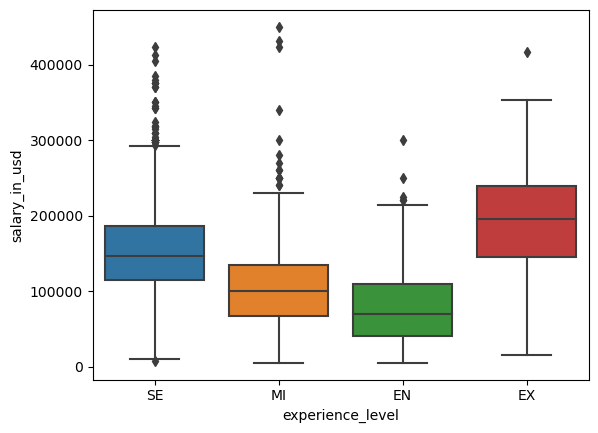

In [93]:
ax = sns.boxplot(x="experience_level", y="salary_in_usd", data=dataset)
plt.show()

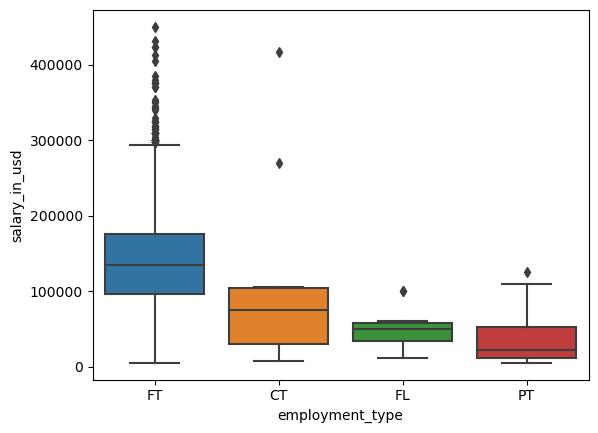

In [94]:
ax = sns.boxplot(x="employment_type", y="salary_in_usd", data=dataset)
plt.show()

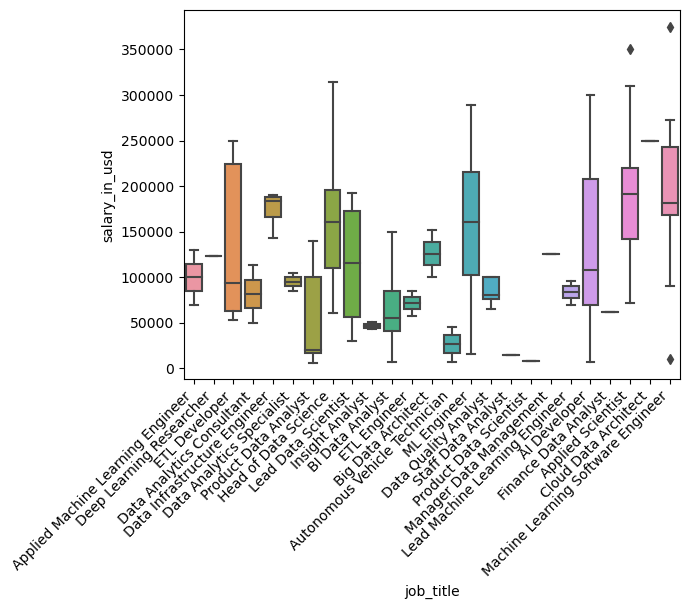

In [95]:
aggregated_data = dataset.groupby("job_title")["salary_in_usd"].median().reset_index()

aggregated_data = aggregated_data.sort_values(by="salary_in_usd", ascending=False)

max_categories = 25
if len(aggregated_data) > max_categories:
    aggregated_data = aggregated_data.sample(max_categories)


ax = sns.boxplot(x="job_title", y="salary_in_usd", data=dataset, order=aggregated_data["job_title"])
plt.xticks(rotation=45, ha="right")  

plt.show()

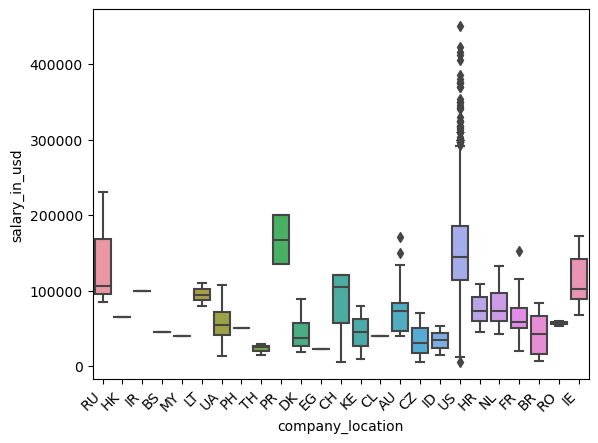

In [96]:
aggregated_data = dataset.groupby("company_location")["salary_in_usd"].median().reset_index()

aggregated_data = aggregated_data.sort_values(by="salary_in_usd", ascending=False)

max_categories = 25
if len(aggregated_data) > max_categories:
    aggregated_data = aggregated_data.sample(max_categories)


ax = sns.boxplot(x="company_location", y="salary_in_usd", data=dataset, order=aggregated_data["company_location"])
plt.xticks(rotation=45, ha="right")  

plt.show()

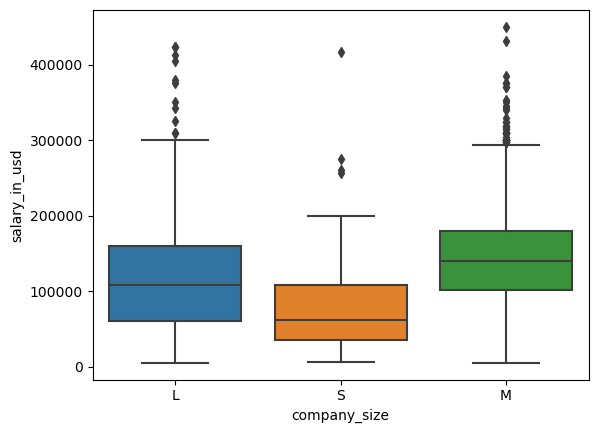

In [97]:
ax = sns.boxplot(x="company_size", y="salary_in_usd", data=dataset)
plt.show()

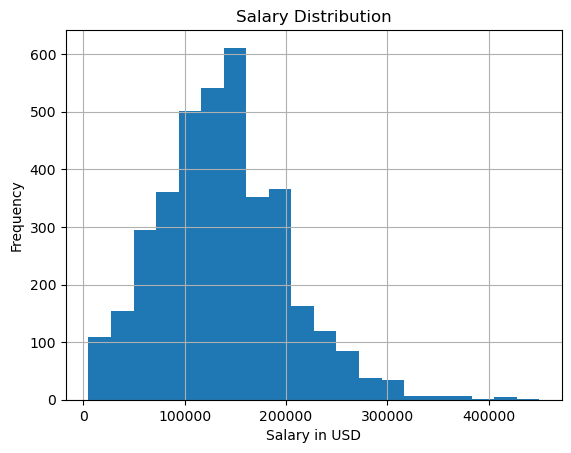

In [98]:
dataset.hist(column='salary_in_usd', bins=20)  
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

We see that 'medium' companies account for the majority of employers in the dataset, we might find some outliers from large and small companies

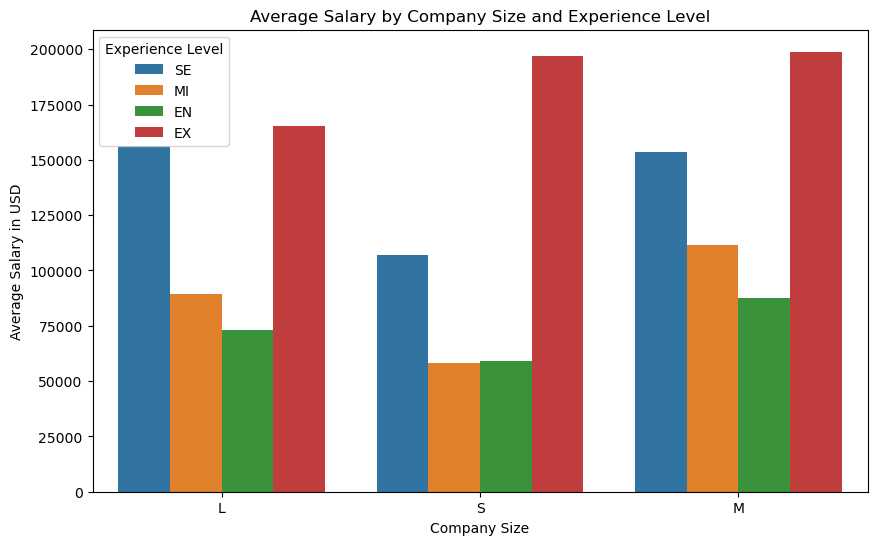

In [99]:
average_salary = dataset.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=dataset, x='company_size', y='salary_in_usd', hue='experience_level', ci=None)
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Company Size and Experience Level')
plt.legend(title='Experience Level')
plt.show()

In [100]:
dataset.corr()

,salary_in_usd,remote_ratio
salary_in_usd,1.000000,-0.064171
remote_ratio,-0.064171,1.000000


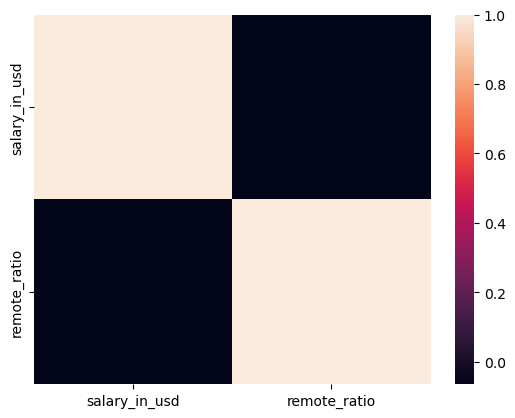

In [101]:
sns.heatmap(dataset.corr());

REMOVING OUTLIERS

By using the IQR method, we will remove from our dataset outliers that lie above 75% percentile and below 25% percentile (Q3 and Q1)

In [102]:
Q1 = dataset['salary_in_usd'].quantile(0.25)
Q3 = dataset['salary_in_usd'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = dataset[(dataset['salary_in_usd'] >= lower_bound) & (dataset['salary_in_usd'] <= upper_bound)]
filtered_data

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,SE,FT,Principal Data Scientist,85847,100,ES,L
1,MI,CT,ML Engineer,30000,100,US,S
2,MI,CT,ML Engineer,25500,100,US,S
3,SE,FT,Data Scientist,175000,100,CA,M
4,SE,FT,Data Scientist,120000,100,CA,M
...,...,...,...,...,...,...,...
3749,SE,FT,Data Specialist,165000,100,US,L
3751,MI,FT,Principal Data Scientist,151000,100,US,L
3752,EN,FT,Data Scientist,105000,100,US,S
3753,EN,CT,Business Data Analyst,100000,100,US,L


In [103]:
filtered_data.describe()

,salary_in_usd,remote_ratio
count,3692.000000,3692.000000
mean,134262.993770,46.289274
std,57992.294349,48.589320
min,5132.000000,0.000000
25%,94916.250000,0.000000
50%,133916.000000,0.000000
75%,174500.000000,100.000000
max,293000.000000,100.000000


In [104]:
Q1 = filtered_data['salary_in_usd'].quantile(0.25)
Q3 = filtered_data['salary_in_usd'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

79583.75


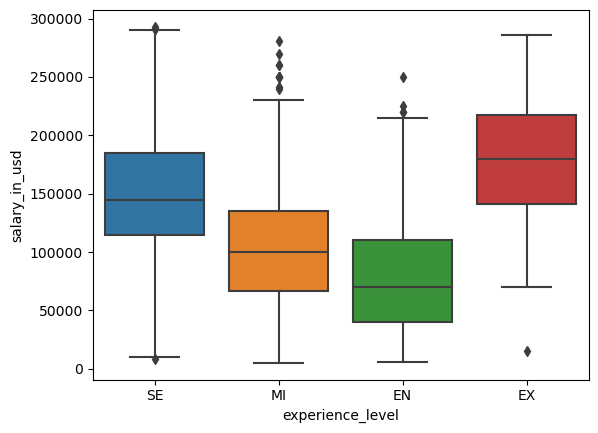

In [105]:
ax = sns.boxplot(x="experience_level", y="salary_in_usd", data=filtered_data)
plt.show()

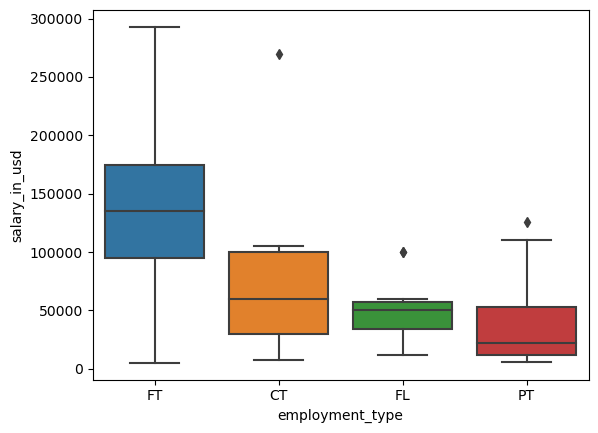

In [106]:
ax = sns.boxplot(x="employment_type", y="salary_in_usd", data=filtered_data)
plt.show()

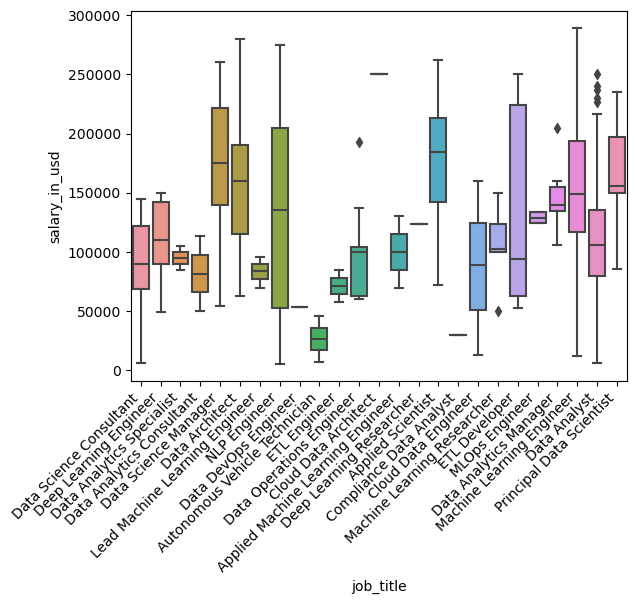

In [107]:
aggregated_data = filtered_data.groupby("job_title")["salary_in_usd"].median().reset_index()

aggregated_data = aggregated_data.sort_values(by="salary_in_usd", ascending=False)

max_categories = 25
if len(aggregated_data) > max_categories:
    aggregated_data = aggregated_data.sample(max_categories)


ax = sns.boxplot(x="job_title", y="salary_in_usd", data=filtered_data, order=aggregated_data["job_title"])
plt.xticks(rotation=45, ha="right")  

plt.show()

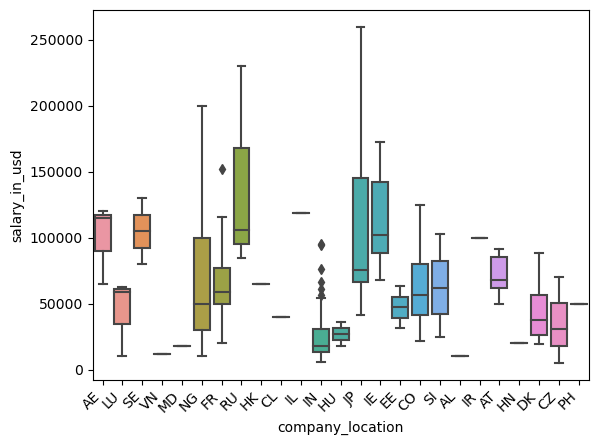

In [108]:
aggregated_data = filtered_data.groupby("company_location")["salary_in_usd"].median().reset_index()

aggregated_data = aggregated_data.sort_values(by="salary_in_usd", ascending=False)

max_categories = 25
if len(aggregated_data) > max_categories:
    aggregated_data = aggregated_data.sample(max_categories)


ax = sns.boxplot(x="company_location", y="salary_in_usd", data=filtered_data, order=aggregated_data["company_location"])
plt.xticks(rotation=45, ha="right")  

plt.show()

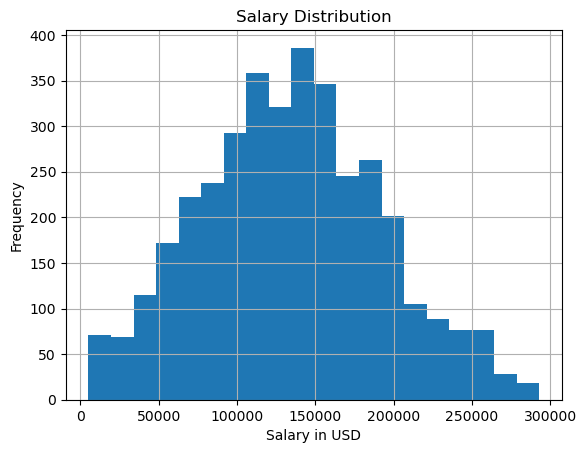

In [109]:
filtered_data.hist(column='salary_in_usd', bins=20)  
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

Compared to the initial ditribution histogram, where the distribution was right-skewed, this time the mean is shifted to the center and takes more the shape of a normal distribution. 

Note that we have removed outliers but we will not take it into the machine learning section, this will be done in a separate Jupyer Notebook where will perfom the entire machine learning part with the new dataset after removing the outliers and we will then perform a sensitivity analysis on both models to assess the overall performance in terms of r2. 

We have initially removed the outliers for display purposes, in terms of box-plots and histograms. 

# Machine learning

1. Initial machine learning model 

In [110]:
X = dataset[['experience_level', 'employment_type', 'remote_ratio', 'company_size', 'company_location']]
y = dataset['salary_in_usd']

X_encoded = pd.get_dummies(X, columns=['experience_level', 'employment_type', 'company_size', 'company_location'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [111]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 42973770819.71571
Mean Squared Error (MSE): 3.4677846012106515e+23
Root Mean Squared Error (RMSE): 588878985973.4045
R-squared (R^2): -87841165456152.3


# Machine learning: min-max scaler

In [112]:
X = dataset[['experience_level', 'employment_type', 'remote_ratio', 'company_size', 'company_location']]
y = dataset['salary_in_usd']


X_encoded = pd.get_dummies(X, columns=['experience_level', 'employment_type', 'company_size', 'company_location'])


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# We apply min-max scaler to the remote ratio, which is the only numerical value in the predictor variables dataset: 

scaler = MinMaxScaler()
X_train[['remote_ratio']] = scaler.fit_transform(X_train[['remote_ratio']])
X_test[['remote_ratio']] = scaler.transform(X_test[['remote_ratio']])

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [113]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 186198752216038.4
Mean Squared Error (MSE): 6.720325495301718e+30
Root Mean Squared Error (RMSE): 2592359059872246.5
R-squared (R^2): -1.7023007240585654e+21


# Normalisation 

We apply normalisation to our machine learning model. Note that 'remote_ratio' is the only numerical predictor variable, the rest, are treated as categoricals. 

In [114]:
X = dataset[['remote_ratio']]
y = dataset['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [115]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 48755.29718507113
Mean Squared Error (MSE): 3920216393.684486
Root Mean Squared Error (RMSE): 62611.63145681868
R-squared (R^2): 0.006984526255339074


# Model performance issues

Some steps that we could take to improve the overall performance of the model include:
1. Hyperparam. tunning
2. Cross-valitation 

# Hyperparameter tuning

In [116]:
target = 'salary_in_usd'
predictors = ['experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_size']

X = dataset[predictors]
y = dataset[target]

X = pd.get_dummies(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

hyperparameters = {
    'alpha': [0.1, 1.0, 10.0],  
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']  
}

model = Ridge()

grid_search = GridSearchCV(estimator=model, param_grid=hyperparameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_hyperparameters = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_val)

In [117]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 42371.22005588524
Mean Squared Error (MSE): 2959553698.7127604
Root Mean Squared Error (RMSE): 54401.780289920294
R-squared (R^2): 0.250326430210692


# Cross validation 

In [118]:
target = 'salary_in_usd'
predictors = ['experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_size']

X = dataset[predictors]
y = dataset[target]

X = pd.get_dummies(X)

model = LinearRegression()

cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)

mse_scores = -cv_scores

mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print("Mean MSE:", mean_mse)
print("Standard Deviation of MSE:", std_mse)

Mean MSE: 4.670334228625226e+26
Standard Deviation of MSE: 7.760211408125329e+26


In [119]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 42371.22005588524
Mean Squared Error (MSE): 2959553698.7127604
Root Mean Squared Error (RMSE): 54401.780289920294
R-squared (R^2): 0.250326430210692


# k-nearest - regression model 

In [120]:
X = dataset[['experience_level', 'employment_type', 'remote_ratio', 'company_size', 'company_location']]
y = dataset['salary_in_usd']

X_encoded = pd.get_dummies(X, columns=['experience_level', 'employment_type', 'company_size', 'company_location'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

k = 5  
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [121]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 45150.02210386152
Mean Squared Error (MSE): 3397034025.2302
Root Mean Squared Error (RMSE): 58284.08037560685
R-squared (R^2): 0.139509911410723


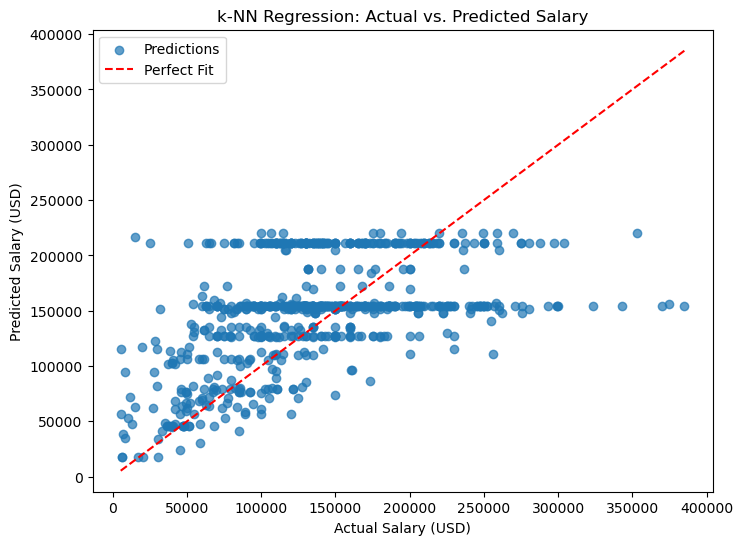

In [122]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Fit')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('k-NN Regression: Actual vs. Predicted Salary')
plt.legend()
plt.show()

In [123]:
residuals = y_test - y_pred

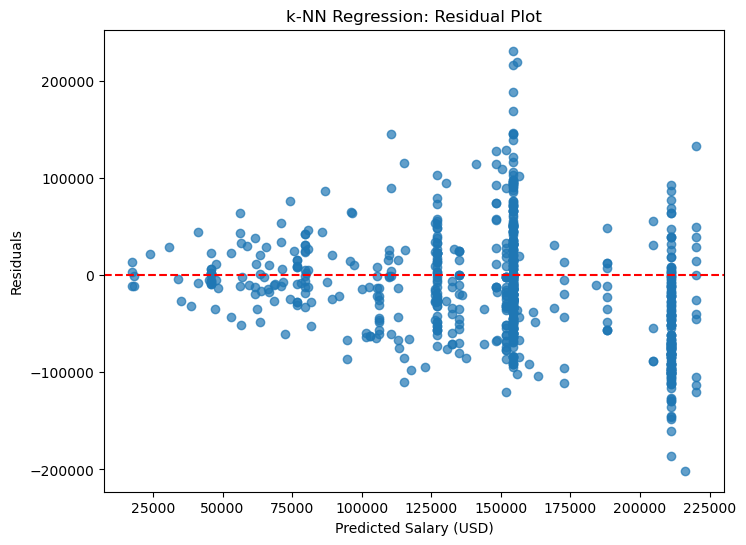

In [124]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary (USD)')
plt.ylabel('Residuals')
plt.title('k-NN Regression: Residual Plot')
plt.show()

# Random forest: to continue with...

In [125]:
X = dataset[['experience_level', 'employment_type', 'remote_ratio', 'company_size', 'company_location']]
y = dataset['salary_in_usd']

X_encoded = pd.get_dummies(X, columns=['experience_level', 'employment_type', 'company_size', 'company_location'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [126]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 2622500084.128211
Root Mean Squared Error: 51210.35133767597
Mean Absolute Error: 39389.1265869569
R-squared: 0.33570423111556846


In [127]:
from pdpbox import pdp, info_plots, get_dataset
from sklearn.inspection import plot_partial_dependence

ImportError: cannot import name 'get_dataset' from 'pdpbox' (C:\Users\ruizg\anaconda3\lib\site-packages\pdpbox\__init__.py)

# Partial dependence

In [175]:
X = dataset[['experience_level', 'employment_type', 'remote_ratio', 'company_location', 'job_title']]
y = dataset['salary_in_usd']

X['job_title'] = X['job_title'].astype('category').cat.codes
X['company_location'] = X['company_location'].astype('category').cat.codes
X['experience_level'] = X['experience_level'].astype('category').cat.codes
X['employment_type'] = X['employment_type'].astype('category').cat.codes

model = RandomForestRegressor()
model.fit(X, y)

features_to_plot = ['experience_level', 'employment_type', 'remote_ratio', 'company_size', 'company_location']

for feature_idx, feature_name in enumerate(features_to_plot):
    feature_indices = feature_idx  # Index of the feature for which to create the plot
    pdp, axes = partial_dependence(model, X, features=feature_indices, grid_resolution=50)
    plt.figure(figsize=(10, 6))
    plt.plot(axes[0], pdp[0])
    plt.xlabel(feature_name)
    plt.ylabel('Partial Dependence')
    plt.title(f'Partial Dependence Plot for {feature_name}')
    plt.show()

NameError: name 'partial_dependence' is not defined

In [162]:
model_performance = pd.read_csv('MODEL PERFORMANCE EVALUATION CSV - Sheet1.csv')
model_performance.head()

,MODEL PERFORMANCE SCENARIO,TRANSFORMATION,MEASURE,VALUE
0,MODEL PERFORMANCE AFTER REMOVING OUTLIERS,HYPERPARAMETER TUNING,Mean Absolute Error (MAE),3.888160e+04
1,MODEL PERFORMANCE AFTER REMOVING OUTLIERS,HYPERPARAMETER TUNING,Mean Squared Error (MSE),2.424919e+09
2,MODEL PERFORMANCE AFTER REMOVING OUTLIERS,HYPERPARAMETER TUNING,R-squared (R^2),2.946600e-01
3,MODEL PERFORMANCE AFTER REMOVING OUTLIERS,HYPERPARAMETER TUNING,Root Mean Squared Error (RMSE),4.924346e+04
4,MODEL PERFORMANCE AFTER REMOVING OUTLIERS,INITIAL MACHINE LEARNING MODEL,Mean Absolute Error (MAE),2.657880e+14


Coming steps:

1. hypothesis testing / anova
2. streamlit application deployment 

# Hypothesis testing 

perform a hypothesis testing where we want to prove that the average salary for an entry level job (experience_level = 'EN') is at least (higher than or equal to) 40.000 (salary_in_usd). Note: this is a one-tail t-test where we take a significance level of 0.05 for our hypothesis testing. 

In [173]:
# Ho: average salary for entry-level position is less than 40.000 usd
# H1: average salary for entry-level posisition is above 40.00 usd

X = dataset[['experience_level', 'employment_type', 'remote_ratio', 'company_location', 'job_title']]
y = dataset['salary_in_usd']

entry_level_salaries = y[X['experience_level'] == 'EN']

null_hypothesis_mean = 40000  
t_statistic, p_value = stats.ttest_1samp(entry_level_salaries, null_hypothesis_mean, alternative='greater')
print("t_statistic = " , t_statistic)
print("p_value = " , p_value)

alpha = 0.05

# Compare p-value with significance level to determine if we keep or reject the null hypothesis 
if p_value < alpha:
    print("Reject the null hypothesis. Average salary for entry-level jobs is less than $40,000.")
else:
    print("Maintain the null hypothesis. Average salary for entry-level jobs is greater than $40,000.")

t_statistic =  13.20308846247441
p_value =  2.3576963334117244e-32
Reject the null hypothesis. Average salary for entry-level jobs is less than $40,000.


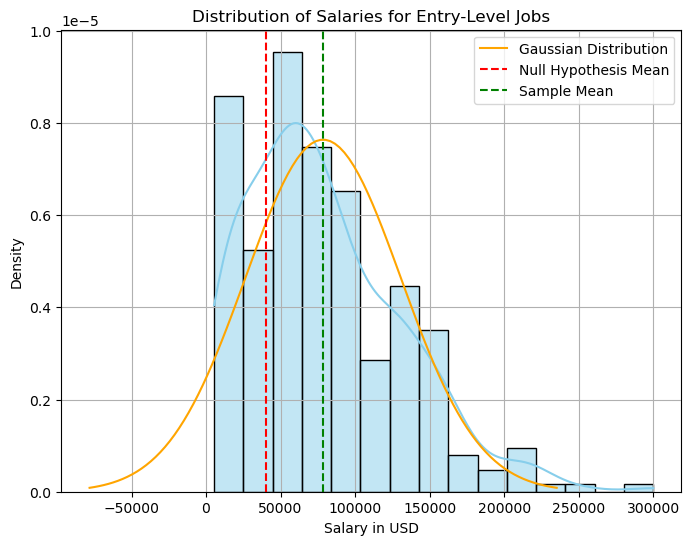

In [171]:
sample_mean = entry_level_salaries.mean()
sample_std = entry_level_salaries.std()

null_hypothesis_mean = 40000

x = np.linspace(sample_mean - 3*sample_std, sample_mean + 3*sample_std, 100)

y_gaussian = stats.norm.pdf(x, sample_mean, sample_std)

plt.figure(figsize=(8, 6))
sns.histplot(entry_level_salaries, kde=True, color='skyblue', stat='density')
plt.plot(x, y_gaussian, color='orange', label='Gaussian Distribution')

plt.axvline(null_hypothesis_mean, color='red', linestyle='--', label='Null Hypothesis Mean')
plt.axvline(sample_mean, color='green', linestyle='--', label='Sample Mean')

plt.xlabel('Salary in USD')
plt.ylabel('Density')
plt.title('Distribution of Salaries for Entry-Level Jobs')
plt.legend()
plt.grid(True)
plt.show()

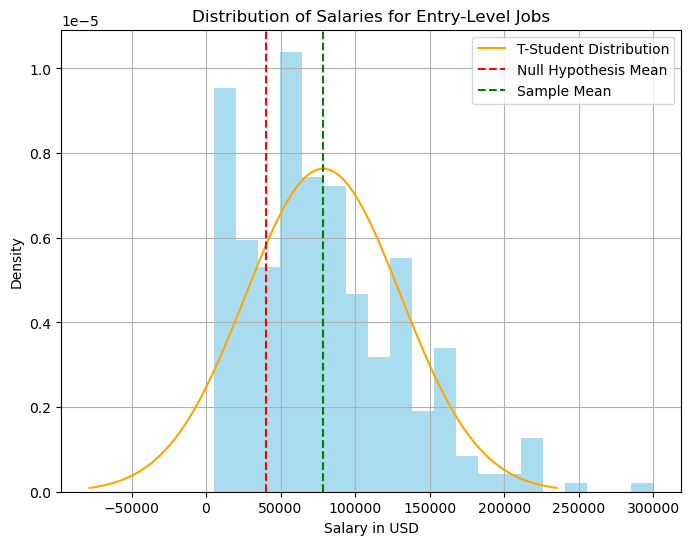

In [172]:
X = dataset[['experience_level', 'employment_type', 'remote_ratio', 'company_location', 'job_title']]
y = dataset['salary_in_usd']

entry_level_salaries = y[X['experience_level'] == 'EN']

sample_mean = entry_level_salaries.mean()
sample_std = entry_level_salaries.std()

null_hypothesis_mean = 40000

x = np.linspace(sample_mean - 3*sample_std, sample_mean + 3*sample_std, 100)

degrees_of_freedom = len(entry_level_salaries) - 1
y_t_student = stats.t.pdf(x, degrees_of_freedom, sample_mean, sample_std)

plt.figure(figsize=(8, 6))
plt.hist(entry_level_salaries, bins=20, density=True, alpha=0.7, color='skyblue')
plt.plot(x, y_t_student, color='orange', label='T-Student Distribution')

plt.axvline(null_hypothesis_mean, color='red', linestyle='--', label='Null Hypothesis Mean')
plt.axvline(sample_mean, color='green', linestyle='--', label='Sample Mean')

plt.xlabel('Salary in USD')
plt.ylabel('Density')
plt.title('Distribution of Salaries for Entry-Level Jobs')
plt.legend()
plt.grid(True)
plt.show()

perform a hypothesis testing where we assume that there is no significant difference between the average salary for an senior and middle management position ('SE', 'ME')

In [174]:
# Ho: there is no significant difference between entry-level and middle management roles in avg. salary 
# H1: there is significant difference between entry-level and middle management roles in avg. salary 

senior_management_salaries = dataset.loc[dataset['experience_level'] == 'SE', 'salary_in_usd']
middle_management_salaries = dataset.loc[dataset['experience_level'] == 'ME', 'salary_in_usd']

t_statistic, p_value = stats.ttest_ind(senior_management_salaries, middle_management_salaries)

alpha = 0.01

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Maintain the null hypothesis")

Maintain the null hypothesis


In this case, we also keep the null hypothesis, meaning that, with 99% of confidence, we can assume that there is not significant difference in the avg. salary between senior and middle level manager positions for the job openings provided in the dataset. 

# Anova 

Based on the initial dataset, we want to find if there has been any significant difference in the avg. salary for the years 2021, 2022 and 2023

In [176]:
salary_2021 = init_dataset[init_dataset['work_year'] == 2021]['salary_in_usd']
salary_2022 = init_dataset[init_dataset['work_year'] == 2022]['salary_in_usd']
salary_2023 = init_dataset[init_dataset['work_year'] == 2023]['salary_in_usd']

f_statistic, p_value = stats.f_oneway(salary_2021, salary_2022, salary_2023)

alpha = 0.01

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Maintain the null hypothesis")

Reject the null hypothesis


# Streamlit application deployment

And finally, here comes the best part of the project!! 

This will be done in Visual Studio Code script, where we will launch the streamlit application from 

Apart from the visual studio code, the application has also been deployed using streamlit url linked to the corresponding git hub repository: 

URL to the application deployed:

https://job-market-analysis.streamlit.app/ 

Github repository: 

https://github.com/carlosruiz-stack/streamlit_app 

# Conclussion, and addittional comments  

Key findings will be provided in a summary. However, we would like to mention that there is another Jupyter Notebook file with the machine learning model built after removing outliers in our dataset. For this book, we just removed outliers fro EDA purposes and data visualisation (box-plot and histograms), however, this is done in detail in the book named 'it_job_offerings_removed_outliers.ipynb'. 